# GPS Coordinates Grid

- Objective: Create a rectangular grid with 5-mile intervals, bounded by cities found in cities.csv
- Purpose: Set up a list of coordinates to pass into Yelp API search queries
- Result: Writes data to grid_coordinates.csv


### Setting Boundaries of Grid
- Get GPS coordinates data on cities in cities.csv
- Search latitude & longitude lists for min/max values
- Set the 4 combinations of above coordinates as corner pts of grid

In [23]:
import geopy.distance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from geopy.geocoders import Nominatim

# #### *Hard coded at bottom due to issue obtaining accurate gps data when processing cities.csv

# # Initialize variables
# state = ", California"
# lat_list = []
# lng_list = []

# # Read cities.csv
# cities_df = pd.read_csv("Resources/cities.csv", names=["City", "County", "Population", "Area (sq. mi)"])

# # Searches each city and appends lat/lng data to respective lists
# geolocator = Nominatim(user_agent='myapplication')
# for city in cities_df["City"]:
#     loc = geolocator.geocode(city + state)
#     lat_list.append(loc.latitude)
#     lng_list.append(loc.longitude)
    
# # Set corner points of grid
# nw = (max(lat_list), min(lng_list))
# ne = (max(lat_list), max(lng_list))
# sw = (min(lat_list), min(lng_list))
# se = (min(lat_list), max(lng_list))

# Set corner points of Bay Area (based on coordinates for cities Gilroy & Cloverdale)
nw = (38.799167, -123.017222)
ne = (38.799167, -121.580000)
sw = (37.011944, -123.017222)
se = (37.011944, -121.580000)

### Mapping the Grid
- Calculate degrees per mile for lat/lng
- Starting at any corner point, increment lat/lng by desired interval until opposite bounds are reached
- Pair every latitude coordinate with every longitude coordinate and save in list

#### Calculating distance between pts to get an idea of size of area

In [24]:
print(geopy.distance.geodesic(nw,ne).miles)

77.57898772266792


In [25]:
print(geopy.distance.geodesic(se,ne).miles)

123.26283515046977


#### Series of logic basically determines how many degrees it takes to increment lat/lng by 5 miles

In [26]:
# Set grid increments (in miles)
grid_increment = 5

# Calculates distance (mi) of boundaries based on coordinates
x_distance = geopy.distance.geodesic(nw,ne).miles
y_distance = geopy.distance.geodesic(se,ne).miles

# Calculates distance of degree separation for boundaries
x_distance_deg = ne[1] - nw[1]
y_distance_deg = ne[0] - se[0]

# Calculates degrees per mile for lng & lat
lng_per_mile = x_distance_deg / x_distance
lat_per_mile = y_distance_deg / y_distance

# Calculates degree increments based on desired grid_increment value
lng_increment = round(lng_per_mile * grid_increment, 6)
lat_increment = round(lat_per_mile * grid_increment, 6)

#### Successive while loops increment from starting position, saving value at each interval until bounds reached

In [27]:
# Expand boundary 5 miles on all sides to ensure complete coverage
nw = (nw[0] + lat_increment, nw[1] - lng_increment)
se = (se[0] - lat_increment, se[1] + lng_increment)

# Lists to store lat/lng points in grid, initialized with nw coordinates
lat_grid_list = [nw[0]]
lng_grid_list = [nw[1]]

# While loop calculates latitude coordinates w/ 5 mi increments until reaching limits set by se
lat = nw[0]
while lat >= se[0]:
    lat = round(lat - lat_increment, 6)
    lat_grid_list.append(lat)
    
# Same as above but for longitude
lng = nw[1]
while lng <= se[1]:
    lng = round(lng + lng_increment, 6)
    lng_grid_list.append(lng)

#### Nested for loops pair every latitude coordinate with every longitude coordinate as tuples

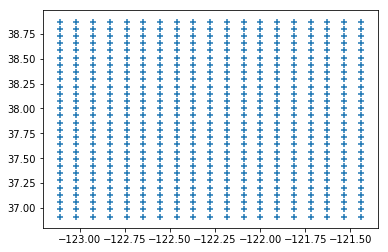

In [28]:
# List to store tuples of coordinates in grid
grid_list = []

########### FOR TESTING IN SCATTERPLOT
lat_grid_coordinates = []
lng_grid_coordinates = []

# Nested loop creates tuple and adds to grid_list
for lat_coord in lat_grid_list:
    for lng_coord in lng_grid_list:
        grid_coordinate = (lat_coord, lng_coord)
        
        ########### FOR TESTING IN SCATTERPLOT
        lat_grid_coordinates.append(lat_coord)
        lng_grid_coordinates.append(lng_coord)
        
        grid_list.append(grid_coordinate)
        
########### FOR TESTING IN SCATTERPLOT        
plt.scatter(lng_grid_coordinates, lat_grid_coordinates, marker='+')
plt.show()

In [29]:
# write grid_list to csv
with open('Resources/grid_coordinates.csv', 'w', encoding="utf-8") as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(grid_list)
csvFile.close()